<a href="https://colab.research.google.com/github/Harshit28012002/MRM-Harshit-JIo-insititute/blob/main/Marketing%20mix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Marketing Channel  Optimized Budget
0            TV_Spend       1014.849781
1         Radio_Spend        865.470797
2         Print_Spend        944.922650
3        Search_Spend       3655.332892
4       YouTube_Spend       1204.284598
5  Social Media_Spend       2315.139282


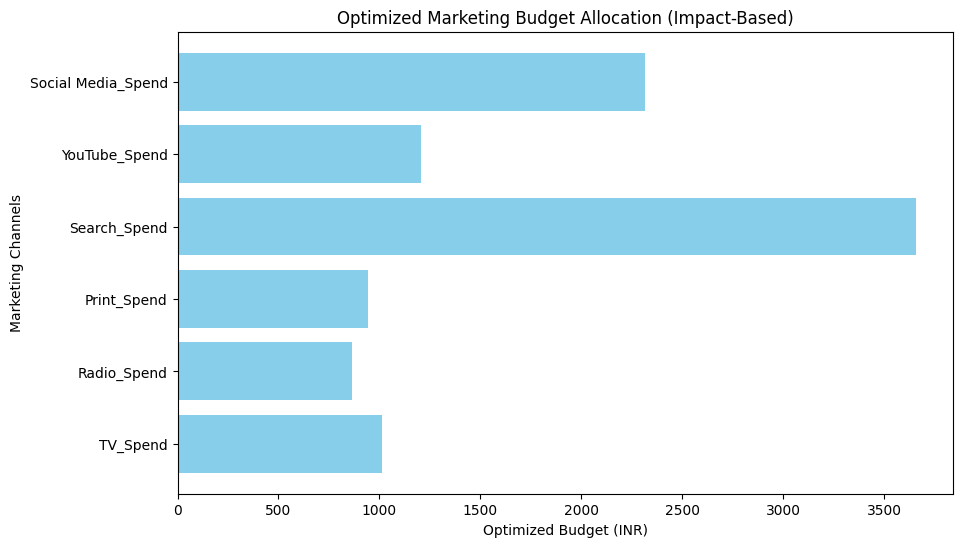

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/content/MMM brand data.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Define independent variables (marketing channels) and dependent variable (sales)
X = df[['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']]
y = df['Sales']

# Standardize the data for better regression performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Get the absolute impact of each channel (ignore negative coefficients)
channel_impacts = np.abs(model.coef_)

# Normalize impacts to sum to 1 (so we can use it for proportional allocation)
normalized_impacts = channel_impacts / np.sum(channel_impacts)

# Define total budget
total_budget = 10000  # INR 10,000

# Allocate budget proportionally based on impact
allocated_budget = normalized_impacts * total_budget

# Convert to DataFrame for better readability
optimized_budget_df = pd.DataFrame({
    'Marketing Channel': X.columns,
    'Optimized Budget': allocated_budget
})

# Display the optimized budget
print(optimized_budget_df)

# Plot the optimized budget allocation
plt.figure(figsize=(10, 6))
plt.barh(optimized_budget_df['Marketing Channel'], optimized_budget_df['Optimized Budget'], color='skyblue')
plt.xlabel("Optimized Budget (INR)")
plt.ylabel("Marketing Channels")
plt.title("Optimized Marketing Budget Allocation (Impact-Based)")
plt.show()


    Marketing Channel  Optimized Budget
0            TV_Spend       1329.046357
1         Radio_Spend       1157.898380
2         Print_Spend        781.406929
3        Search_Spend       3144.109909
4       YouTube_Spend       1188.920663
5  Social Media_Spend       2398.617763


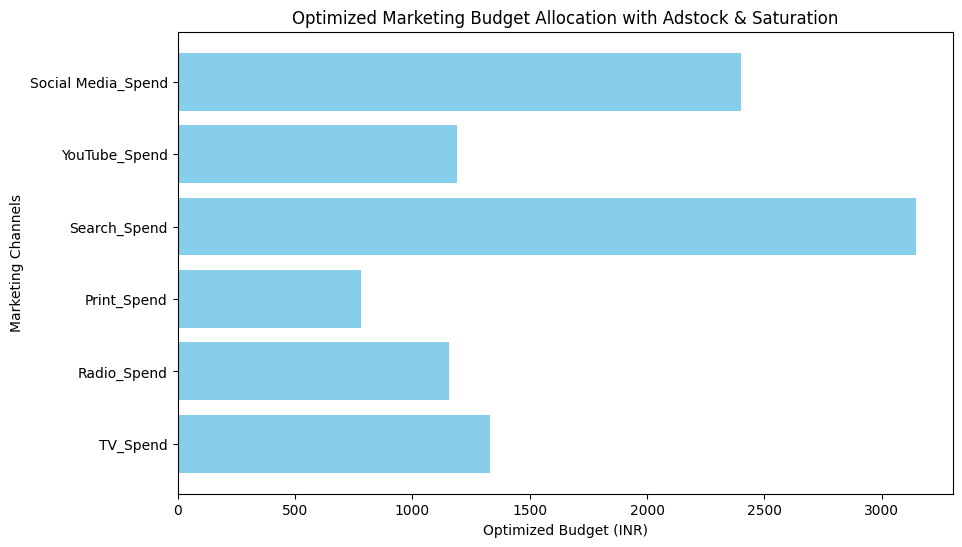

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/content/MMM brand data.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Define marketing spend channels & sales
channels = ['TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']
X = df[channels]
y = df['Sales']

# --- APPLY ADSTOCK EFFECT ---
def apply_adstock(data, decay=0.5):
    adstock_values = np.zeros_like(data)
    adstock_values[0] = data[0]  # First value remains same
    for i in range(1, len(data)):
        adstock_values[i] = data[i] + decay * adstock_values[i-1]
    return adstock_values

# Apply Adstock to all marketing channels
X_adstocked = X.apply(lambda col: apply_adstock(col.values, decay=0.5), axis=0)

# --- APPLY SATURATION EFFECT ---
def saturation_function(spend, alpha=0.7, beta=5000):
    return (spend ** alpha) / (spend ** alpha + beta ** alpha)

# Apply saturation to marketing channels
X_saturated = X_adstocked.apply(lambda col: saturation_function(col), axis=0)

# Standardize data for modeling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_saturated)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Get the absolute impact of each channel (ignore negative coefficients)
channel_impacts = np.abs(model.coef_)

# Normalize impacts to sum to 1 (so we can use it for proportional allocation)
normalized_impacts = channel_impacts / np.sum(channel_impacts)

# Define total budget
total_budget = 10000  # INR 10,000

# Allocate budget proportionally based on impact
allocated_budget = normalized_impacts * total_budget

# Convert to DataFrame for better readability
optimized_budget_df = pd.DataFrame({
    'Marketing Channel': channels,
    'Optimized Budget': allocated_budget
})

# Display the optimized budget
print(optimized_budget_df)

# Plot the optimized budget allocation
plt.figure(figsize=(10, 6))
plt.barh(optimized_budget_df['Marketing Channel'], optimized_budget_df['Optimized Budget'], color='skyblue')
plt.xlabel("Optimized Budget (INR)")
plt.ylabel("Marketing Channels")
plt.title("Optimized Marketing Budget Allocation with Adstock & Saturation")
plt.show()
